In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import random
random.seed(123)

In [2]:
data = pd.read_csv('Logistic_regression.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [4]:
def one_hot_encoding(df,NA_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,dummy_na=NA_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df,new_columns

In [5]:
# Load the necessary libraries 
# Set the seed to 123



# load the dataset into the memory
data = pd.read_csv('Logistic_regression.csv')


# Pre-processing steps
'''You may need to clean the variables, impute the missing values and convert the categorical variables to one-hot encoded

following variables need to be converted to one_hot encoded
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

your final table should be like the following 

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)
'''

# Your code goes here

def one_hot_encoding(df,NA_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns,dummy_na=NA_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df,new_columns

data2 = one_hot_encoding(data,False)[0]
data2.shape



data2.head()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [6]:
'''
separate the features and the target variable 
'''

x = data2.drop('y',axis =1)
y = data2['y']

In [7]:

'''
as your target class is imbalanced you need to use SMOTE function to balance it, first separate your data into training and testing set.
then use SMOTE function on the Training set.remember to not touch the testing set.
'''

from imblearn.over_sampling import SMOTE
# your code goes here


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())



print(sum(y_train_res==1))
print(sum(y_train_res==0))
X_train_res = pd.DataFrame(data=X_train_res,columns = X_train.columns)
y_train_res = pd.DataFrame(data= y_train_res,columns=['y'])

Number transactions X_train dataset:  (28831, 61)
Number transactions y_train dataset:  (28831,)
Number transactions X_test dataset:  (12357, 61)
Number transactions y_test dataset:  (12357,)
25567
25567


In [8]:
X_train_res.shape

(51134, 61)

In [9]:
y_train_res.shape

(51134, 1)

In [10]:
#

In [12]:
#select features first
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_res, y_train_res.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True False False  True
 False  True False False False False False False False False False False
 False  True False False  True False False False  True  True False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True False False False False False False  True False
  True]
[37 36 24 38  9 12 22 34  1 32  8  1  7  1  5 31  2  4 28  3  6 10 21 19
 15  1 14 18  1 17 16 20  1  1 41 25 39 35 30 40 33  1  1  1  1  1  1  1
  1  1  1  1 27 29 11 26 42 23  1 13  1]


In [13]:
mask = rfe.support_
new_feature = []
for bool_, feature in zip(mask, X_train_res.columns):
    if bool_:
        new_feature.append(feature)

In [14]:
X_marked = X_train_res[new_feature]
X_marked.head()

,euribor3m,job_blue-collar,job_housemaid,marital_unknown,education_illiterate,default_no,default_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success
0,4.153,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4.857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.153,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.266,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:


'''
You need to eliminate variables with p-values larger than 0.05. To do so you can use the following function


'''

# Your Code goes here
import statsmodels.api as sm

logit = sm.Logit(y_train_res, X_marked)
result=logit.fit()
print(result.summary2())


         Current function value: 0.545904
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.212     
Dependent Variable:      y                    AIC:                  55868.4619
Date:                    2019-02-14 01:52     BIC:                  56045.3060
No. Observations:        51134                Log-Likelihood:       -27914.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m         

C:\Users\A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [16]:
pVals = result.pvalues
keep_columns = pVals[pVals<= 0.05].index
keep_columns

Index(['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown',
       'education_illiterate', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [17]:
X_train_final = X_train_res[keep_columns]
X_train_final.shape

(51134, 16)

In [18]:
xx = X_train_final
yy = y_train_res
logit_model=sm.Logit(yy,xx)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555890
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   y                 AIC:               56881.7793
Date:                 2019-02-14 01:52  BIC:               57023.2546
No. Observations:     51134             Log-Likelihood:    -28425.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6838 0.0000 -0.4632 -0.4343
job_blue-collar 

In [19]:




'''
Logistic Regression Model Fitting - iterative approach 
you need to complete the following functions 
'''

def sigmoid(kid):
    '''
    parameters : scores 
    does : calculate the sigmoid value of the scores
    return : the sigmoid value
    '''
    return 1 / (1 + np.exp(-kid))


def log_likelihood(features, targets , weights):
    '''
    paramters : Input variables, Target variable and weights 
    does : calculate the log-likelihood 
    return : the log-likelihood
    '''

    WeightFeature = np.dot(features, weights)
    loglike = np.sum( targets*WeightFeature - np.log(1 + np.exp(WeightFeature)) )
    return loglike

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, learning_rate,add_intercept = False): # parameter, add_intercept = False):
    '''
    parameters : features, target, num_steps, learning_rate and add_intercept = False
    does : calculate the logistic regression weights, i have provided the add_intercept section of the code, to run you need to change the value from False to True 
    return : The logistic regression weights
    '''
    
    # Don't modify this part 
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))

    # Your code goes here
    weights = np.zeros(features.shape[1])
    

    ''' You need to iterate over the number of steps and update the weights in each iteration based on the gradient '''
    for step in range(num_steps):
        # Calculate the prediction value
        y_predictions = sigmoid(np.dot(features, weights))

        # Update weights with gradient
        error = target - y_predictions
        gradient = np.dot(features.T, error)
        weights += learning_rate * gradient
        # Print log-likelihood every so often - don't change this part 
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
            print(weights)
    return weights
        





In [ ]:
#Weight = logistic_regression(X_train_final, y_train_res.y.values, 100000,  1e-6,add_intercept = True)

In [20]:
'''
Split the data into train and test set using 30% of the data for the test set
'''

# Your code goes here


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_FINAL, X_test_FINAL, y_train_FINAL, y_test_FINAL = train_test_split(xx, yy, test_size=0.3, random_state=0)


'''
Train your logistic regression function over your training set and test it over your test set, You may need to tune the parameters to get
a better results
'''

Weight_train = logistic_regression(X_train_FINAL, y_train_FINAL.y, 200000,  5e-6,add_intercept = True)



-23973.268147156577
[-2.25000000e-05 -7.47849428e-02 -4.30435929e-03 -2.97838550e-04
  5.36440063e-05  4.27362479e-05  2.59426779e-03 -8.86998643e-04
  5.77953248e-04 -1.74567436e-03 -2.11701569e-04  2.26166941e-03
 -7.04594577e-03 -3.98622614e-04  2.60922659e-03  1.44890964e-03
  7.90747097e-03]
-19553.9492985756
[ 1.91439574 -0.48925631 -0.20496419 -0.40132847  0.43609292  0.23332182
 -0.53690301 -0.33512079  0.0078929  -0.04178729 -0.19091161  1.00095945
 -1.16804452 -0.44687121  0.90709411 -0.49436502  1.68184848]
-19548.75232617013
[ 2.03393346 -0.48775677 -0.2035799  -0.40385948  0.65107678  0.42302615
 -0.66110299 -0.46296491 -0.14519671 -0.17034667 -0.31868103  0.86965104
 -1.29248388 -0.57579355  0.7650215  -0.4955566   1.67801837]
-19546.713992149
[ 2.10684433 -0.48699096 -0.20279448 -0.404524    0.75669565  0.57657004
 -0.7364539  -0.54017901 -0.24829804 -0.24789157 -0.3957895   0.78626985
 -1.36788626 -0.65370572  0.68033172 -0.49630425  1.67593727]
-19545.817894009306
[ 2.

In [21]:
final_result = np.array([2.23519281, -0.48565523, -0.20155501, -0.4060702 , 0.85979324, 1.30147915, -0.86998486, - 0.67611493, -0.42953018, -0.38405549, -0.5310473 , 0.64110397, -1.50052861, -0.79182939, 0.53264779, -0.49718156, 1.67300408])
final_result

array([ 2.23519281, -0.48565523, -0.20155501, -0.4060702 ,  0.85979324,
        1.30147915, -0.86998486, -0.67611493, -0.42953018, -0.38405549,
       -0.5310473 ,  0.64110397, -1.50052861, -0.79182939,  0.53264779,
       -0.49718156,  1.67300408])

In [22]:
Weight_train

array([ 2.23510324, -0.48565895, -0.20155267, -0.40602132,  0.85975966,
        1.26626573, -0.86981297, -0.67597683, -0.42940479, -0.38394228,
       -0.53094209,  0.64120009, -1.50041766, -0.7916242 ,  0.53275279,
       -0.49720983,  1.67298841])

### Weight_train is very close to final_result

In [23]:
from sklearn.metrics import confusion_matrix
    
# Your code goes here
X_test_FINAL2 = np.hstack((np.ones((X_test_FINAL.shape[0], 1)),X_test_FINAL))
ff = np.dot(X_test_FINAL2, Weight_train)
preds = np.round(sigmoid(ff))
preds
cm = confusion_matrix(y_test_FINAL.y, preds)
print(cm)

[[6122 1544]
 [2502 5173]]


In [24]:
def plot_cm(cm, classes,normalize=False,title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        1

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label')
    plt.xlabel('Predicted label \n accuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

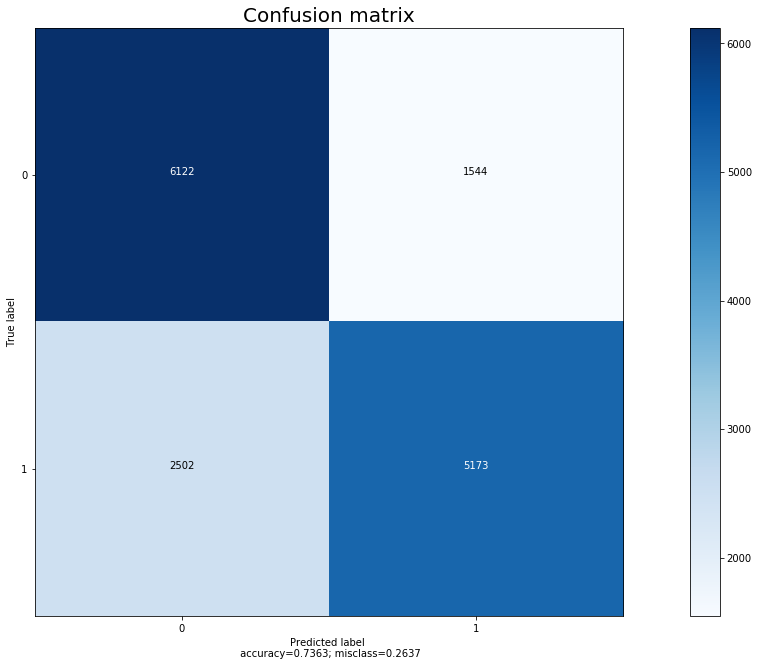

In [25]:
import itertools
from scipy import stats
classes = [0,1]
plt.figure(figsize = (19,9))
plot_cm(cm,classes)

In [26]:
preds

array([0., 1., 1., ..., 0., 1., 0.])